## Равномерное распределение

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
import numpy as np
from scipy.stats import randint

Попробуем рассчитать вероятности для случайной величины, которая принимает значения от 1 включительно до 7 не включительно (собственно, это как раз пример с пирожными):

In [16]:
# Задаём возможные значения случайной величины
x = np.arange(1, 7)
# Задаём интервал, на котором будут распределяться наши вероятности
disc_uni_dist = randint(1, 7)
# Вычисляем вероятности выпадения каждого значения случайной величины
pmf = disc_uni_dist.pmf(x)
#Получаем вероятности для каждого из шести значений:
print(pmf)

[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


Также мы можем найти кумулятивную вероятность для распределения, то есть для каждого  вероятность того, что случайная величина примет значение Xj или меньше:

In [17]:
# Рассчитаем кумулятивную вероятность
cdf = disc_uni_dist.cdf(x)
print(cdf)

[0.16666667 0.33333333 0.5        0.66666667 0.83333333 1.        ]


Теперь давайте попробуем с помощью функций Python решить другую задачу.

?

Вы участвуете в розыгрыше бесплатного места на новый курс по Data Science. Вы знаете, что участников 250.

Какова вероятность, что на курс попадёт кто-то из первых пятидесяти зарегистрировавшихся?

In [18]:
# Задаём возможные значения случайной величины
x = np.arange(1, 251)
# Задаём интервал, на котором будут распределяться наши вероятности
disc_uni_dist = randint(1,251)
# Вычисляем вероятности выпадения каждого значения случайной величины
cdf = disc_uni_dist.cdf(x)
# Ищем вероятность того, что на курс попадёт кто-то из первых 50 зарегистрировавшихся
print(cdf[49])

0.2


В результате получаем 0.2 — это вероятность того, что выигрыш получит кто-то, чей порядковый номер — от 1 до 50. Разумеется, вероятность не зависит от самого номера, поэтому для номеров с 51 по 100 вероятность будет ровно такая же.

## Распределение Бернулли

In [19]:
from scipy.stats import bernoulli
import seaborn as sns

С помощью специальной функции bernoulli.rvs() из библиотеки scipy мы можем смоделировать распределение Бернулли и, например, увидеть ожидаемое соотношение попаданий и промахов для решённой задачи, если будет сделано 500 выстрелов:

[Text(0.5, 0, 'Значение случайной величины'), Text(0, 0.5, 'Частота')]

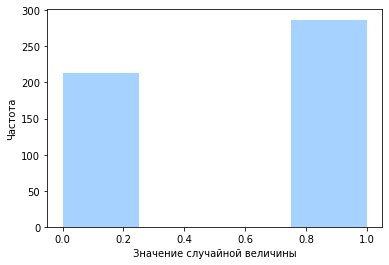

In [20]:
data = bernoulli.rvs(size=500,p=0.6)
ax = sns.distplot(data,
                  kde = False,
                  color='dodgerblue')
ax.set(xlabel='Значение случайной величины', ylabel='Частота')

Также можно вывести количество неудач и попаданий в нашей модели:

In [21]:
unique, counts = np.unique(data, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 213]
 [  1 287]]


Итак, мы получили результат, близкий к ожидаемому, но с некоторыми погрешностями, что, разумеется, является нормальным.

## Биномиальное распределение

In [27]:
from numpy import random

Как и для распределения Бернулли, для биномиального распределения можно смоделировать какое-то количество попыток и получить результат. Например, можно смоделировать биноминальное распределение с параметром p = 0.5 и количеством испытаний, равным 10, и реализовать 1000 попыток:

<AxesSubplot:>

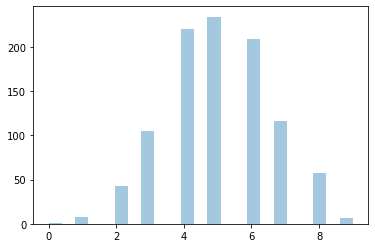

In [29]:
x = random.binomial(n=10, p=0.5, size=10)
sns.distplot(random.binomial(n=10, p=0.5, size=1000), hist=True, kde=False)

Можно видеть, что чаще всего можно наблюдать пять успешных исходов.

## Распределение Пуассона

In [31]:
import scipy

Рассчитаем вероятности для всех возможных количеств операторов, пока не получим вероятность того, что вызов находится на удержании, которая будет меньше 10 %:

In [32]:
scipy.stats.distributions.poisson.pmf(5, 4.5)

0.17082685848611215

Также можно смоделировать распределение Пуассона. Например, будем рассматривать 1000 реализаций случайной величины, у которой Л=3:

<AxesSubplot:>

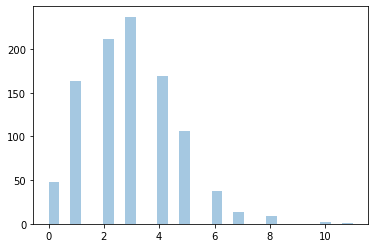

In [34]:
sns.distplot(random.poisson(lam=3, size=1000), kde=False)

Вы стреляете по мишени. Вероятность набрать максимальное количество очков составляет 7 %. В этом случае вы выиграете плюшевого медведя стоимостью 5000 рублей. Если наберёте меньше максимума, то не выиграете ничего.

Сколько должен стоить билет, чтобы обеспечить игру, в которой выигрыш равен вашим ожидаемым затратам и ожидаемым затратам продавца?

In [1]:
# Вероятность выигрыша и его стоимость
p_win = 0.07
win_cost = 5000

# Вероятность проигрыша и стоимость билета
p_lose = 0.93
ticket_cost = None

# Рассчитываем стоимость билета
ticket_cost = p_win * win_cost / p_lose
print("Стоимость билета:", round(ticket_cost, 2))

# Рассчитываем ожидаемые затраты продавца
seller_cost = p_lose * ticket_cost
print("Ожидаемые затраты продавца:", round(seller_cost, 2))

Стоимость билета: 376.34
Ожидаемые затраты продавца: 350.0


Вы купили 85 лотерейных билетов. Для каждого из них вероятность выигрыша составляет 0.001.

Найдите математическое ожидание для количества выигрышных билетов.



In [2]:
# Вероятность выигрыша одного лотерейного билета
p = 0.001

# Количество лотерейных билетов
n = 85

# Рассчитываем математическое ожидание количества выигрышных билетов
expected_value = n * p

print("Математическое ожидание количества выигрышных билетов:", expected_value)

Математическое ожидание количества выигрышных билетов: 0.085
